In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../Kursach"))

['.ipynb_checkpoints', 'BlackFriday.csv', 'FirstStep.ipynb']


In [12]:
##reading the data 
data_frame = pd.read_csv('BlackFriday.csv')

In [13]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [15]:
data_frame.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [21]:
## to check which columns have null values.
data_frame.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2            False
Product_Category_3            False
Purchase                      False
dtype: bool

In [20]:
print('Product_Category_2', data_frame['Product_Category_2'].unique())
print('Product_Category_3', data_frame['Product_Category_3'].unique())

Product_Category_2 [ 0  6 14  2  8 15 16 11  5  3  4 12  9 10 17 13  7 18]
Product_Category_3 [ 0 14 17  5  4 16 15  8  9 13  6 12  3 18 11 10]


In [22]:
## So all values are in integer range. May be we can assign value zero for the NaN cases
data_frame.fillna(value=0,inplace=True)
## Also looks like the product categories are float while they can be int.
data_frame["Product_Category_2"] = data_frame["Product_Category_2"].astype(int)
data_frame["Product_Category_3"] = data_frame["Product_Category_3"].astype(int)
print('Product_Category_2', data_frame['Product_Category_2'].unique())
print('Product_Category_3', data_frame['Product_Category_3'].unique())

Product_Category_2 [ 0  6 14  2  8 15 16 11  5  3  4 12  9 10 17 13  7 18]
Product_Category_3 [ 0 14 17  5  4 16 15  8  9 13  6 12  3 18 11 10]


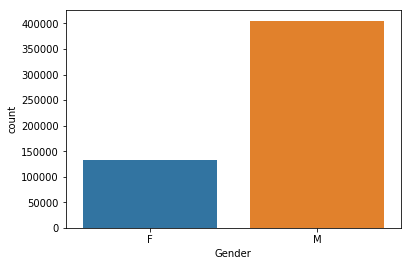

In [23]:
sns.countplot(data_frame['Gender'])

In [24]:
print("Всего совершенно покупок: ", data_frame['User_ID'].count())
print(data_frame.groupby(['Gender'])['User_ID'].count())

Всего совершенно покупок:  537577
Gender
F    132197
M    405380
Name: User_ID, dtype: int64


In [26]:
Q_Customer = data_frame['User_ID'].drop_duplicates()
print("Всего покупателей: ", Q_Customer.count())

Всего покупателей:  5891


In [27]:
#Количество покупателей, мужчин и женщин
print(Q_Customer[data_frame.Gender=='F'].count())
print(Q_Customer[data_frame.Gender=='M'].count())

1666
4225


In [28]:
#Среднее число покупок для мужчины и женщины 
print(data_frame.groupby(['Gender'])['Product_ID'].count())
Average_QF = 132197/1666
Average_QM = 405380/4225
print("Среднее количество покупок для женщины:", Average_QF)
print("Среднее количество покупок для мужчины:", Average_QM)

Gender
F    132197
M    405380
Name: Product_ID, dtype: int64
Среднее количество покупок для женщины: 79.3499399759904
Среднее количество покупок для мужчины: 95.94792899408284


In [29]:
#Средняя сумма покупки для мужчины и для женщины
print(data_frame.groupby(['Gender'])['Purchase'].mean())

Gender
F    8809.761349
M    9504.771713
Name: Purchase, dtype: float64


5017668378
Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64


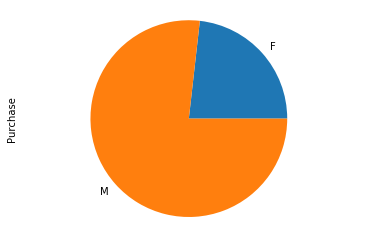

In [31]:
#Сумма покупок для женщины и мужчин
print(data_frame['Purchase'].sum())
Sum_Purchase = data_frame.groupby(['Gender'])['Purchase'].sum()
print(Sum_Purchase)
Sum_Purchase .plot(kind='pie')
plt.axis('equal')
plt.show()

In [23]:
#Женатые и неженатые число покупателей
print(Q_Customer[data_frame.Marital_Status==0].count())
print(Q_Customer[data_frame.Marital_Status==1].count())

3417
2474


Marital_Status  Gender
0               F          673815717
                M         2292473783
1               F          490808304
                M         1560570574
Name: Purchase, dtype: int64


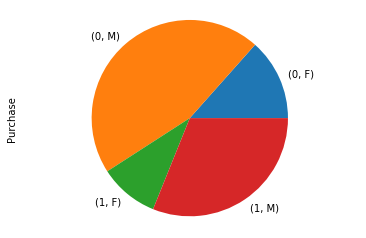

In [33]:
#Число покупок женатых и неженатых
Purchase_Marital=data_frame.groupby(['Marital_Status', 'Gender'])['Purchase'].sum()
print(Purchase_Marital)
Purchase_Marital.plot(kind='pie')
plt.axis('equal')
plt.show()

In [27]:
#Число покупок женатых и неженатых
data_frame.groupby(['Marital_Status', 'Gender'])['Purchase'].mean()

Marital_Status  Gender
0               F         8753.809299
                M         9518.540223
1               F         8887.751553
                M         9484.617891
Name: Purchase, dtype: float64

Age
0-17      132659006
18-25     901669280
26-35    1999749106
36-45    1010649565
46-50     413418223
51-55     361908356
55+       197614842
Name: Purchase, dtype: int64


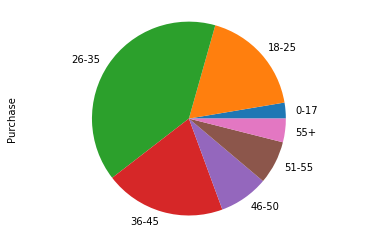

In [34]:
Purchase_Age=data_frame.groupby(['Age'])['Purchase'].sum()
print(Purchase_Age)
Purchase_Age.plot(kind='pie')
plt.axis('equal')
plt.show()

In [32]:
data_frame.groupby(['Age'])['Purchase'].mean()

Age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: Purchase, dtype: float64

Product_Category_1
1     138353
2      23499
3      19849
4      11567
5     148592
6      20164
7       3668
8     112132
9        404
10      5032
11     23960
12      3875
13      5440
14      1500
15      6203
16      9697
17       567
18      3075
Name: User_ID, dtype: int64


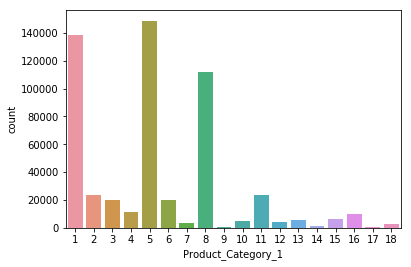

In [35]:
Product_Category_Numbers = data_frame.groupby(['Product_Category_1'])['User_ID'].count()
print(Product_Category_Numbers)
sns.countplot(data_frame['Product_Category_1'])

Product_Category_1  Age  
1                   0-17      3524
                    18-25    26627
                    26-35    57398
                    36-45    27215
                    46-50    10292
                    51-55     8950
                    55+       4347
2                   0-17       789
                    18-25     4348
                    26-35     8784
                    36-45     4856
                    46-50     2068
                    51-55     1763
                    55+        891
3                   0-17      1180
                    18-25     4633
                    26-35     7524
                    36-45     3785
                    46-50     1343
                    51-55      908
                    55+        476
4                   0-17       744
                    18-25     2436
                    26-35     4124
                    36-45     2311
                    46-50      971
                    51-55      666
                    55+      

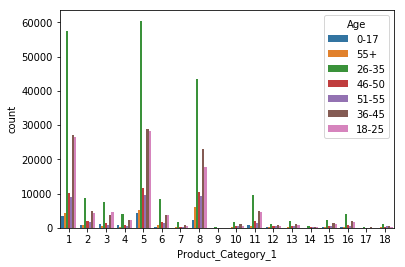

In [36]:
Product_Category_Age=data_frame.groupby(['Product_Category_1', 'Age'])['User_ID'].count()
print(Product_Category_Age)
sns.countplot(data_frame['Product_Category_1'], hue = data_frame['Age'])

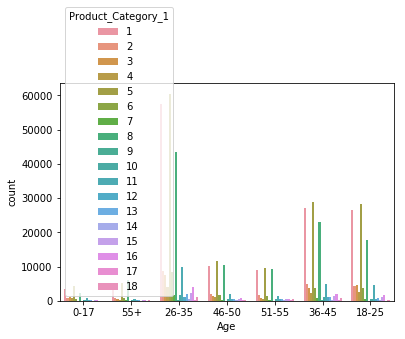

In [68]:
sns.countplot(data_frame['Age'], hue = data_frame['Product_Category_1'])

In [43]:
data_frame.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023024,0.018732,0.003687,0.003663,0.003938,0.005389
Occupation,-0.023024,1.000000,0.024691,-0.008114,0.006792,0.011941,0.021104
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.001146,-0.004363,0.000129
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,-0.040730,-0.389048,-0.314125
Product_Category_2,0.003663,0.006792,0.001146,-0.040730,1.000000,0.090284,0.038395
Product_Category_3,0.003938,0.011941,-0.004363,-0.389048,0.090284,1.000000,0.284120
Purchase,0.005389,0.021104,0.000129,-0.314125,0.038395,0.284120,1.000000


In [37]:
Mar_Status=data_frame.Marital_Status
Category_1=data_frame.Product_Category_1
np.corrcoef(Mar_Status,Category_1)[1,0]

0.020545866143891256

In [38]:
Mar_Status=data_frame.Marital_Status
Category_2=data_frame.Product_Category_2
np.corrcoef(Mar_Status,Category_2)[1,0]

0.0011457223247804686

In [39]:
Mar_Status=data_frame.Marital_Status
Category_3=data_frame.Product_Category_3
np.corrcoef(Mar_Status,Category_3)[1,0]

-0.004363498887573811

In [40]:
Occup=data_frame.Occupation
np.corrcoef(Occup,Category_1)[1,0]

-0.008114402754234248

In [41]:
np.corrcoef(Occup,Category_2)[1,0]

0.0067919948604231225

In [42]:
np.corrcoef(Occup,Category_3)[1,0]

0.011940924554724884

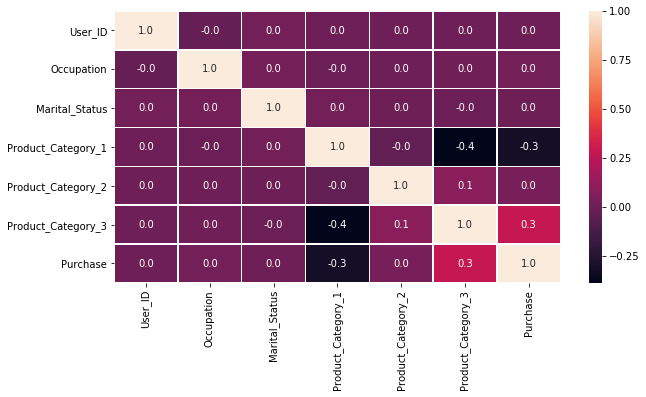

In [51]:
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(data_frame.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()